In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from scipy.stats import stats
%matplotlib inline
from IPython.display import display

cwd = os.getcwd()

In [2]:
# read the new dataframe back into memory
df = pd.read_csv(os.path.join(cwd, "Citibike_Clean", "CitiBike-NYC-FINAL.csv.zip"),
                       compression="zip")

# change the datatype for several columns into categorical to save on RAM memory
df["Start Station ID"] = pd.Categorical(df["Start Station ID"])
df["End Station ID"] = pd.Categorical(df["End Station ID"])
df["Bike ID"] = pd.Categorical(df["Bike ID"])
df["User Type"] = pd.Categorical(df["User Type"])
df["Birth Year"] = pd.Categorical(df["Birth Year"])
df["Gender"] = pd.Categorical(df["Gender"])
df["Start Year"] = pd.Categorical(df["Start Year"])
df["Start Month"] = pd.Categorical(df["Start Month"])
df["Start Day"] = pd.Categorical(df["Start Day"])
df["Start Hour"] = pd.Categorical(df["Start Hour"])

df.head()

,Start Station ID,End Station ID,Bike ID,User Type,Birth Year,Gender,Start Year,Start Month,Start Day,Start Hour,Duration_Seconds,Station_Distance,Seconds_per_Metre
0,3226,3165,25542,Subscriber,1965.0,2,2017,1,1,0,680,875,0.78
1,3226,3165,24209,Customer,NaN,0,2017,1,1,14,1756,875,2.01
2,3226,3165,15708,Customer,NaN,0,2017,1,1,14,1750,875,2.00
3,3226,3165,18403,Customer,NaN,0,2017,1,1,14,1735,875,1.98
4,3226,3165,16505,Customer,NaN,0,2017,1,1,14,1691,875,1.93


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55188692 entries, 0 to 55188691
Data columns (total 13 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Start Station ID   category
 1   End Station ID     category
 2   Bike ID            category
 3   User Type          category
 4   Birth Year         category
 5   Gender             category
 6   Start Year         category
 7   Start Month        category
 8   Start Day          category
 9   Start Hour         category
 10  Duration_Seconds   int64   
 11  Station_Distance   int64   
 12  Seconds_per_Metre  float64 
dtypes: category(10), float64(1), int64(2)
memory usage: 1.9 GB


In [4]:
# the dataset is polluted with rides with a distance of 1 metre (placeholder for value of 0)
# slice out the values of 1 and write back to csv
df = df.loc[df["Station_Distance"] > 1, :]

# dataset is also polluted with negative time values
df = df.loc[df["Duration_Seconds"] > 0, :]

df.to_csv(os.path.join(cwd, "Citibike_Clean", "CitiBike-NYC-FINAL-Valid_Distance.csv.zip"),
                index=False, compression="zip")

df.head()

,Start Station ID,End Station ID,Bike ID,User Type,Birth Year,Gender,Start Year,Start Month,Start Day,Start Hour,Duration_Seconds,Station_Distance,Seconds_per_Metre
0,3226,3165,25542,Subscriber,1965.0,2,2017,1,1,0,680,875,0.78
1,3226,3165,24209,Customer,NaN,0,2017,1,1,14,1756,875,2.01
2,3226,3165,15708,Customer,NaN,0,2017,1,1,14,1750,875,2.00
3,3226,3165,18403,Customer,NaN,0,2017,1,1,14,1735,875,1.98
4,3226,3165,16505,Customer,NaN,0,2017,1,1,14,1691,875,1.93


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54071511 entries, 0 to 55188690
Data columns (total 13 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Start Station ID   category
 1   End Station ID     category
 2   Bike ID            category
 3   User Type          category
 4   Birth Year         category
 5   Gender             category
 6   Start Year         category
 7   Start Month        category
 8   Start Day          category
 9   Start Hour         category
 10  Duration_Seconds   int64   
 11  Station_Distance   int64   
 12  Seconds_per_Metre  float64 
dtypes: category(10), float64(1), int64(2)
memory usage: 2.3 GB


In [6]:
# delete and read the dataframe back into memory
del df

# read the new dataframe back into memory
df = pd.read_csv(os.path.join(cwd, "Citibike_Clean", "CitiBike-NYC-FINAL-Valid_Distance.csv.zip"),
                       compression="zip")

# change the datatype for several columns into categorical to save on RAM memory
df["Start Station ID"] = pd.Categorical(df["Start Station ID"])
df["End Station ID"] = pd.Categorical(df["End Station ID"])
df["Bike ID"] = pd.Categorical(df["Bike ID"])
df["User Type"] = pd.Categorical(df["User Type"])
df["Birth Year"] = pd.Categorical(df["Birth Year"])
df["Gender"] = pd.Categorical(df["Gender"])
df["Start Year"] = pd.Categorical(df["Start Year"])
df["Start Month"] = pd.Categorical(df["Start Month"])
df["Start Day"] = pd.Categorical(df["Start Day"])
df["Start Hour"] = pd.Categorical(df["Start Hour"])

df.head()

,Start Station ID,End Station ID,Bike ID,User Type,Birth Year,Gender,Start Year,Start Month,Start Day,Start Hour,Duration_Seconds,Station_Distance,Seconds_per_Metre
0,3226,3165,25542,Subscriber,1965.0,2,2017,1,1,0,680,875,0.78
1,3226,3165,24209,Customer,NaN,0,2017,1,1,14,1756,875,2.01
2,3226,3165,15708,Customer,NaN,0,2017,1,1,14,1750,875,2.00
3,3226,3165,18403,Customer,NaN,0,2017,1,1,14,1735,875,1.98
4,3226,3165,16505,Customer,NaN,0,2017,1,1,14,1691,875,1.93


In [7]:
# get maximum and minimums
max_seconds = df['Duration_Seconds'].max()
min_seconds = df['Duration_Seconds'].min()
max_distance = df['Station_Distance'].max()
min_distance = df['Station_Distance'].min()
max_custom = df['Seconds_per_Metre'].max()
min_custom = df['Seconds_per_Metre'].min()

print(f"max seconds: {max_seconds}, min seconds: {min_seconds}")
print(f"max distance: {max_distance}, min distance: {min_distance}")
print(f"max sec/dist: {max_custom}, min sec/dist: {min_custom}")

max seconds: 19513649, min seconds: 61
max distance: 8672624, min distance: 8
max sec/dist: 26865.75, min sec/dist: 0.0


In [9]:
# slice out every 100th value
df = df[::100]

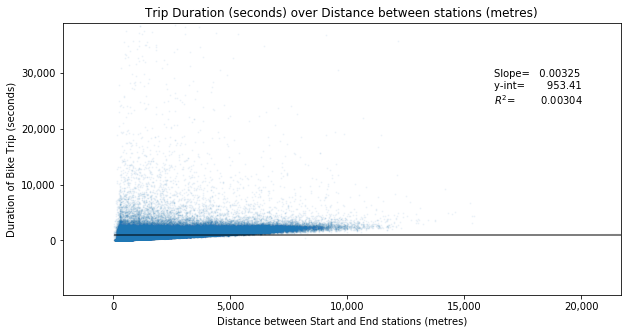

In [19]:
# calculate trendline
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df["Station_Distance"].values,
                                                               y=df["Duration_Seconds"].values)
slope = np.around(slope, decimals=5)
intercept = np.around(intercept, decimals=2)
r_value = np.around(r_value, decimals=5)

y_vals = (slope * df["Station_Distance"].values) + intercept

# plot a scatter plot of seconds against distance
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

ax.scatter(x="Station_Distance",
            y="Duration_Seconds", data=df,
            alpha=0.05, s=1)
ax.plot(df["Station_Distance"].values,
        y_vals, color="black", alpha=0.5)
ax.set_ylim(bottom=-max_seconds/2000, top=max_seconds/500)
ax.set_xlim(left=-max_distance/4000, right=max_distance*1/400)
ax.set_title("Trip Duration (seconds) over Distance between stations (metres)")
ax.set_xlabel("Distance between Start and End stations (metres)")
ax.set_ylabel("Duration of Bike Trip (seconds)")
ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# annotation
ax.annotate(s=(f"Slope={slope:>10}\n"+f"y-int={intercept:>13}\n"+fr"$R^2$={r_value:>15}"),
            xy=(max_distance*3/4*1/400, max_seconds/800))
fig.savefig(os.path.join("images", "Trip_Duration_vs_Distance_Stations.png"));

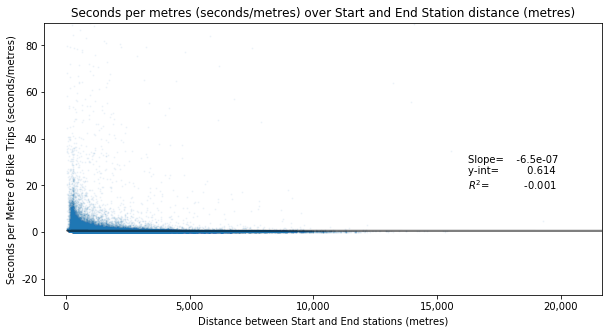

In [27]:
# calculate trendline
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df["Station_Distance"].values,
                                                               y=df["Seconds_per_Metre"].values)
slope = np.around(slope, decimals=8)
intercept = np.around(intercept, decimals=3)
r_value = np.around(r_value, decimals=3)

y_vals = (slope * df["Station_Distance"].values) + intercept

# plot a scatter plot of seconds against distance
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

ax.scatter(x="Station_Distance",
            y="Seconds_per_Metre", data=df,
            alpha=0.05, s=1)
ax.plot(df["Station_Distance"].values,
        y_vals, color="black", alpha=0.5)
ax.set_ylim(bottom=-max_custom/1000, top=max_custom/300)
ax.set_xlim(left=-max_distance/10000, right=max_distance*1/400)
ax.set_title("Seconds per metres (seconds/metres) over Start and End Station distance (metres)")
ax.set_xlabel("Distance between Start and End stations (metres)")
ax.set_ylabel("Seconds per Metre of Bike Trips (seconds/metres)")
ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# annotation
ax.annotate(s=(f"Slope={slope:>12}\n"+f"y-int={intercept:>14}\n"+fr"$R^2$={r_value:>17}"),
            xy=(max_distance*3/4*1/400, max_custom*1/1500))
fig.savefig(os.path.join("images", "Duration_Distance_vs_Distance_Stations.png"));

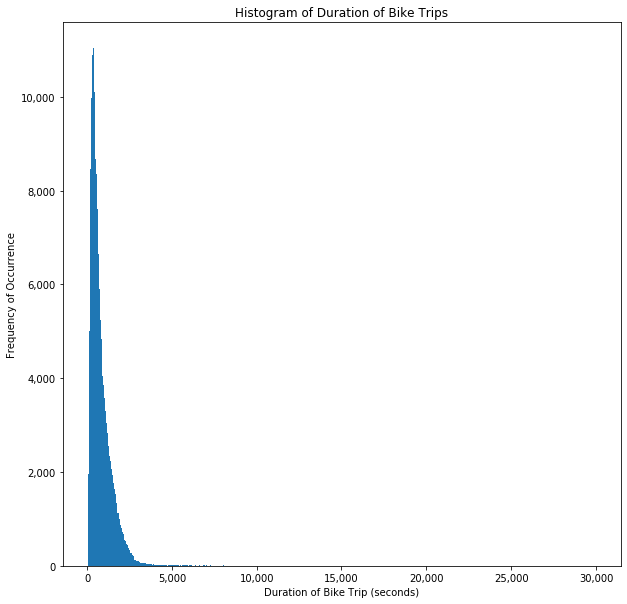

In [28]:
# lets look at 30,000 seconds or less (~8 hours)
df_less = df["Duration_Seconds"].loc[df["Duration_Seconds"] <= 30_000].values

# use Freedman–Diaconis rule for bin width then calculate number of bins from there
iqr = stats.iqr(df_less)
n = len(df_less)
bins = (np.max(df_less) - np.min(df_less)) / (2 * iqr / np.cbrt(n))

# plot a histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.hist(df_less, bins=int(bins)+1)
ax.set_title("Histogram of Duration of Bike Trips")
ax.set_xlabel("Duration of Bike Trip (seconds)")
ax.set_ylabel("Frequency of Occurrence")
ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
fig.savefig(os.path.join("images", "Histogram of Duration of Bike Trips.png"));

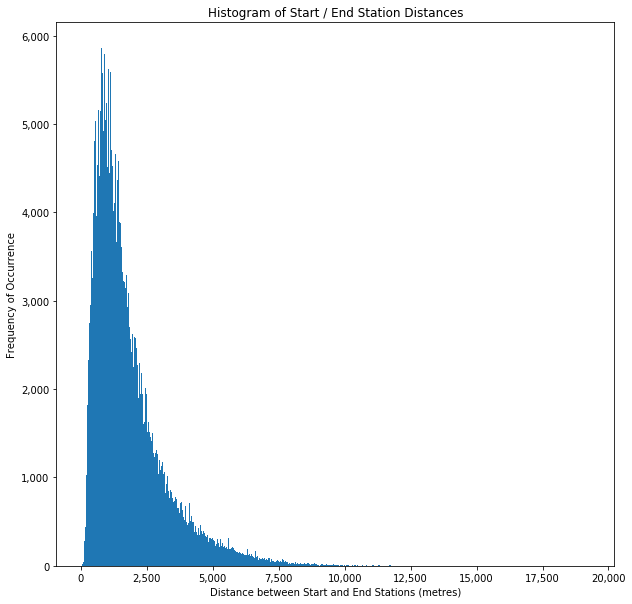

In [35]:
# lets look at 30,000 seconds or less (~8 hours)
df_less = df["Station_Distance"].loc[df["Station_Distance"] < 20_000].values

# plot a histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.hist(df_less, bins=1000)
ax.set_title("Histogram of Start / End Station Distances")
ax.set_xlabel("Distance between Start and End Stations (metres)")
ax.set_ylabel("Frequency of Occurrence")
ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
fig.savefig(os.path.join("images", "Histogram of Start and End Station Distances.png"));

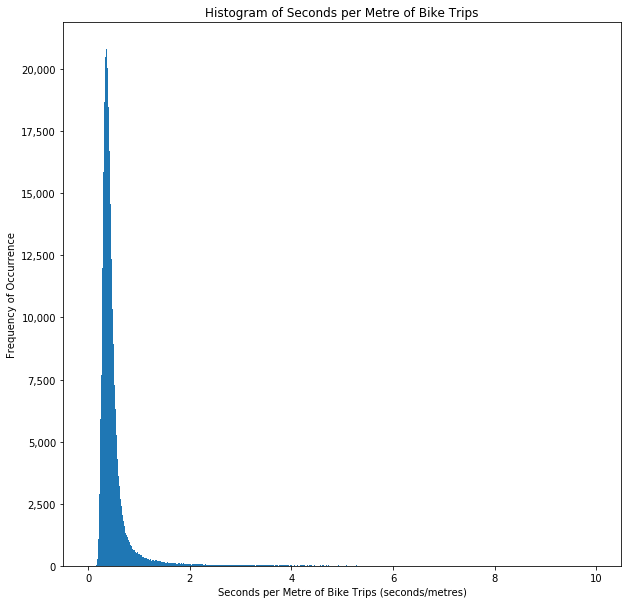

In [43]:
# plot the seconds per metre histogram
df_less = df["Seconds_per_Metre"].loc[df["Seconds_per_Metre"] < 10].values

# plot a histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.hist(df_less, bins=1000)
ax.set_title("Histogram of Seconds per Metre of Bike Trips")
ax.set_xlabel("Seconds per Metre of Bike Trips (seconds/metres)")
ax.set_ylabel("Frequency of Occurrence")
ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
fig.savefig(os.path.join("images", "Histogram of Seconds per Metre of Bike Trips.png"));